# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [5]:
df = pd.read_csv("Classified Data" , usecols=[i for i in range(1,12)])
df_np = df.to_numpy()

### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [6]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [9]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)
# conf_matrix

***Print Misclassification error rate***

In [13]:
print(f"Test Error: {100*np.sum(y_test != pred)/y_test.shape[0]}% \n Test Accuracy: {100*np.sum(y_test == pred)/y_test.shape[0]}%")

Test Error: 8.2% 
 Test Accuracy: 91.8%


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.2, random_state=101)

boxplots = []
mean_ = []
min_ = []
max_ = []
test_acc = []
for k in range (1 , 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  cv = KFold(n_splits=4, random_state=1, shuffle=True)
  scores = cross_val_score(knn, X_train_val, y_train_val, scoring='accuracy', cv=cv, n_jobs=-1)
  mean_.append(np.mean(1 - scores))
  min_.append(np.min(1 - scores))
  max_.append(np.max(1 - scores))

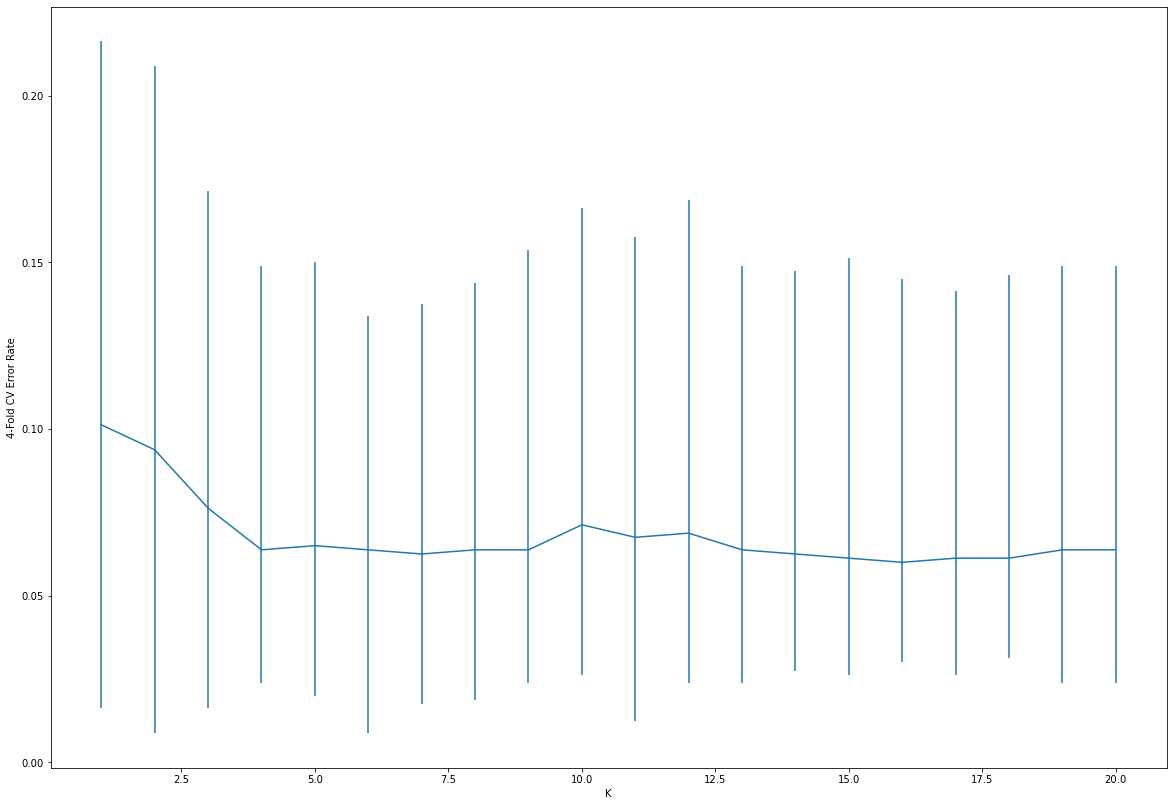

In [15]:
fig = plt.figure(figsize =(20, 14))
plt.errorbar(np.arange(1 , 21, 1), mean_, [min_, max_])
plt.xlabel("K")
plt.ylabel("4-Fold CV Error Rate")
plt.show()

In [19]:
means_scaled = mean_/np.max(mean_)
range_scaled = (np.array(max_)-np.array(min_))/np.max(np.array(max_)-np.array(min_))

best_k = np.argmin(means_scaled*range_scaled) + 1
best_accuracy = 1 - mean_[best_k - 1]
print(f"best K : {best_k}")
print(f"best Validation Accuracy : {best_accuracy}%")
print(f"test set accuracy: {100*np.sum(y_test == KNeighborsClassifier(n_neighbors=best_k).fit(X_train_val, y_train_val).predict(X_test))/y_test.shape[0]}")

best K : 6
best Validation Accuracy : 0.93625%
test set accuracy: 93.5
